In [1]:
import sys
import os

SCRIPT_PATH = os.path.join(os.path.abspath(os.path.dirname('../__file__')), 'script')
sys.path.insert(0, SCRIPT_PATH)


from markov_pyactup import *
from statsmodels.formula.api import logit, glm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import functools as ft
import matplotlib.ticker as ticker

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


main_dir = os.path.dirname(os.path.realpath('../__file__'))

Error trying to connect to ACT-R at 127.0.0.1 : 2651 with exception (<class 'ConnectionRefusedError'>, ConnectionRefusedError(111, 'Connection refused'), <traceback object at 0x7ffa08a20ac0>)
ACT-R connection NOT established, but no exception detected or already handled.
Could not start ACT-R connection.


## Simulate EVC

In below code, I assign different decay values, reward values to IBL model and see how expected value of control change as a function of these two parameters

In [2]:
df = MarkovSimulation.simulate_expected_value_control(model_name='markov-ibl-hybrid', param1='reward', param2='decay', epoch=100, num_steps=10)

In [3]:
df.head()

,epoch,control,reward,decay,variable,value
0,0,"(A, f)",0.07,0.1,r,0.007
1,0,"(A, k)",0.07,0.1,r,0.021
2,0,"(B, f)",0.07,0.1,r,0.007
3,0,"(B, k)",0.07,0.1,r,0.007
4,0,"(C, f)",0.07,0.1,r,0.007


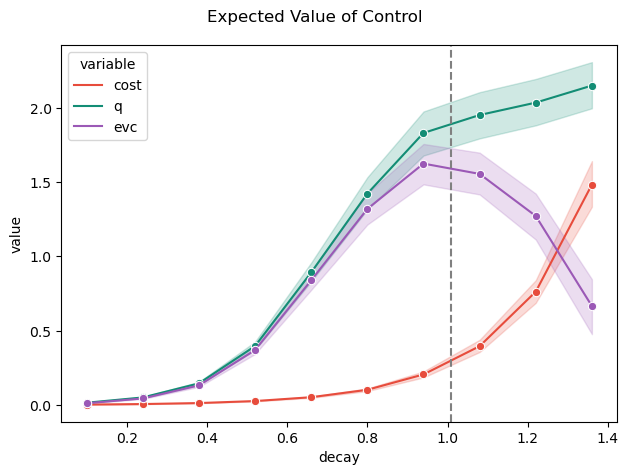

In [4]:
MarkovPlot.plot_expected_value_control(df, x_name='decay', combine=True)

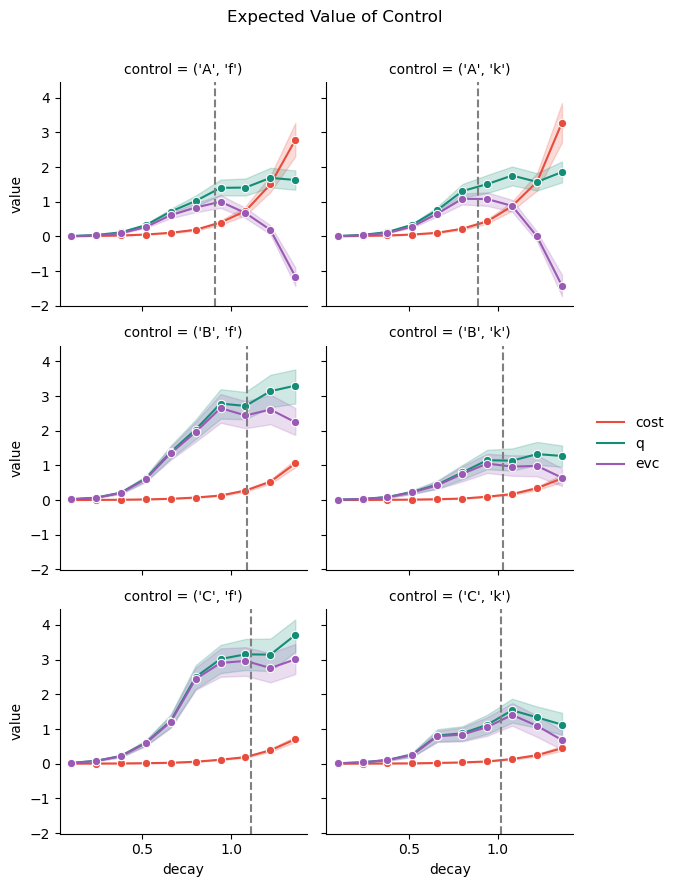

In [5]:
MarkovPlot.plot_expected_value_control(df, x_name='decay', combine=False)

Since we lonly look at the first 10 trials, we expected 

C1 has higher expected reward than C2, B1 has higher expected reward than B2.

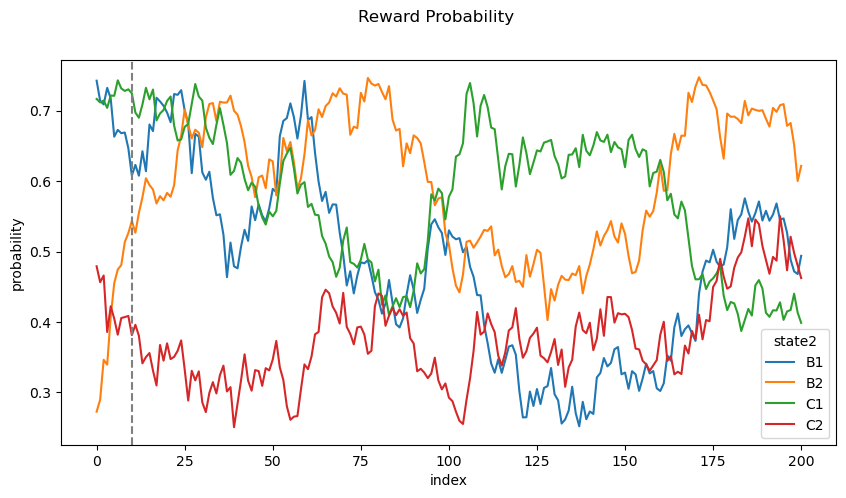

In [6]:
df_prob = pd.read_csv(os.path.join(main_dir, 'data', 'fixed', 'masterprob4.csv'))
df_prob.columns = ['B1', 'B2', 'C1', 'C2']
df_prob = df_prob.reset_index().melt(id_vars=['index'], var_name='state2', value_name='probability')

fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Reward Probability')
ax = sns.lineplot(data=df_prob, x='index', y='probability', hue='state2')
ax.axvline(x=10, c='gray', ls='--')

plt.show()